In [1]:
%matplotlib inline


# Label image regions


This example shows how to segment an image with image labelling. The following
steps are applied:

1. Thresholding with automatic Otsu method
2. Close small holes with binary closing
3. Remove artifacts touching image border
4. Measure image regions to filter small objects



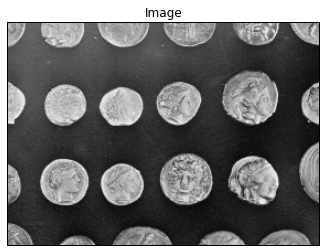

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = data.coins()[50:-50, 50:-50]
plt.imshow(image,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()


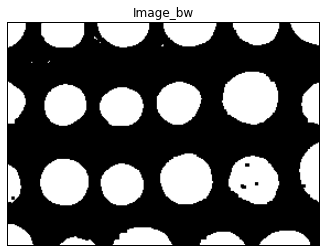

In [5]:
# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

plt.imshow(bw,cmap = 'gray')
plt.title('Image_bw'), plt.xticks([]), plt.yticks([])
plt.show()

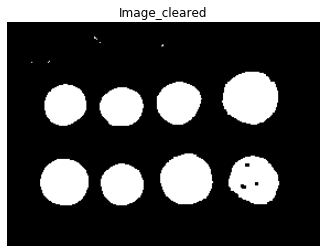

In [6]:
# remove artifacts connected to image border
cleared = clear_border(bw)
plt.imshow(cleared,cmap = 'gray')
plt.title('Image_cleared'), plt.xticks([]), plt.yticks([])
plt.show()


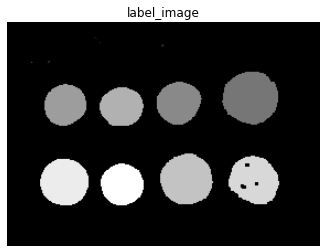

In [7]:
# label image regions
label_image = label(cleared)
plt.imshow(label_image,cmap = 'gray')
plt.title('label_image'), plt.xticks([]), plt.yticks([])
plt.show()

In [23]:
label_image.shape
label_image.size
#print label_image[1][1]
#print label_image.shape
initial=0
for i in range(label_image.shape[0]):
    for j in range(label_image.shape[1]):
        if initial<label_image[i][j]:
            print label_image[i][j]
            initial=label_image[i][j]

1
2
3
4
5
6
7
8
9
10
11
12
13


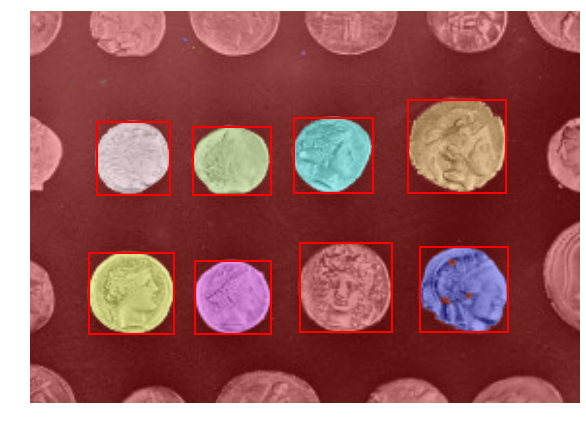

In [24]:
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()